* With Bootstrapped Error Bars
* What does the ACC of all the maps with Bootstrapped Error Bars look like?
* Plots
* Compare Ratio of Error Bars

In [1]:
import subprocess
import numpy as np
import healpy as hp
import pickle
from random import randint
import joblib
import sklearn
import sys
import importlib

sys.path.append('../methods_code_Nresol/')
sys.path.append('../utils/')
from utils_circpatch import *
from vis_utils import *
import astro_cuts
import methods_cluster

### Computing ACC

In [2]:
sys.path.append('../')
import acc_evaluation_lib

### Get Bootstrapped ErrorBars

### Bootstrapped error bars for all maps in panel

In [3]:
sfdmap = get_sfd_map()
b17map = get_bayestar2017_map()
b19map = get_bayestar2019_map()
gnilcmap = get_gnilc_map()

Multiplying by the blue tip correction factor of 0.86
Multiplying by the EBV conversion factor of 0.856 derived from E(g-r) relation (Eq1)
linux
Multiplying by the EBV conversion factor of 0.856 derived from E(g-r) relation (Eq1)
Multiplying by the EBV conversion factor of 1.0, the slope of SFD*0.86 with GNILC at pixhigh


In [4]:
nbmaindir = '../notebooks_main1/'

In [5]:
fskdir = '../notebooks_main1/fullsky_runs/'
fits61 = hp.fitsfunc.read_map(fskdir+'fits_outputs/recon_fw6-1_final_mult.fits', field=None, h=True)
reconzpt61, var61_corr = fits61[0][1], fits61[0][3]

In [6]:
fits15 = hp.fitsfunc.read_map(fskdir+'fits_outputs/recon_fw15_final_mult.fits', field=None, h=True)
reconzpt15, var15_corr = fits15[0][1], fits15[0][3]

In [7]:
maps = [sfdmap, b17map, b19map, gnilcmap, reconzpt61, reconzpt15]
names = ['SFD', 'Bayestar17', 'Bayestar19', 'GNILC', 'Recon FWHM=6.1\'', 'Recon FWHM=15\'']
smooths=[30]
rots=[0]
maskingname='NGC'
savename='runs/2_6/accdir/panel'
save_smoothed=False
save_acc_intgn=True
error_args = {'errortype':'Sampling', 'n_bootstrap': None}

In [10]:
fptdict = pickle.load(open(fskdir+'footprints/ftp_minimal_7_4.pkl', 'rb'))

In [12]:
reconpix = fptdict['pixels']

In [ ]:
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, reconpix, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
arcmin: 30
ang 0
arcmin: 30
ang 0
arcmin: 30
ang 0
arcmin: 30


In [14]:
import vis_utils

In [16]:
plt.rcParams.update({'font.family':'serif', 'font.size': 16})

In [17]:
accbtsdict = pickle.load(open('runs/2_6/accdir/panel_acc_intgn_bootstrapped.pkl', 'rb'))
accbts = accbtsdict['accs_all']

SFD_sm30


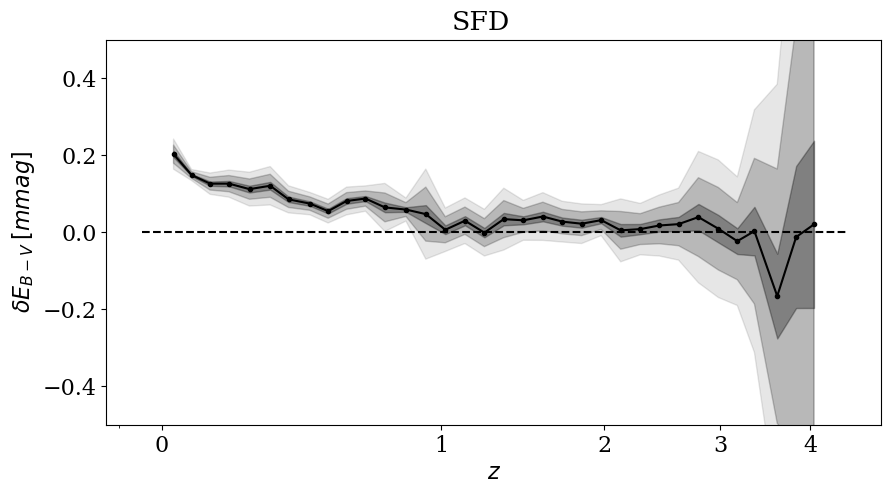

In [18]:
vis_utils.plot_acc_comparison_sampling([accbts[0:1]], cols='k', title='SFD', sigcontours=[1, 3, 5], no_legend=True, savefig='../plots/accpanel_bootstrapped/11-20_sfd.png')

Bayestar17_sm30


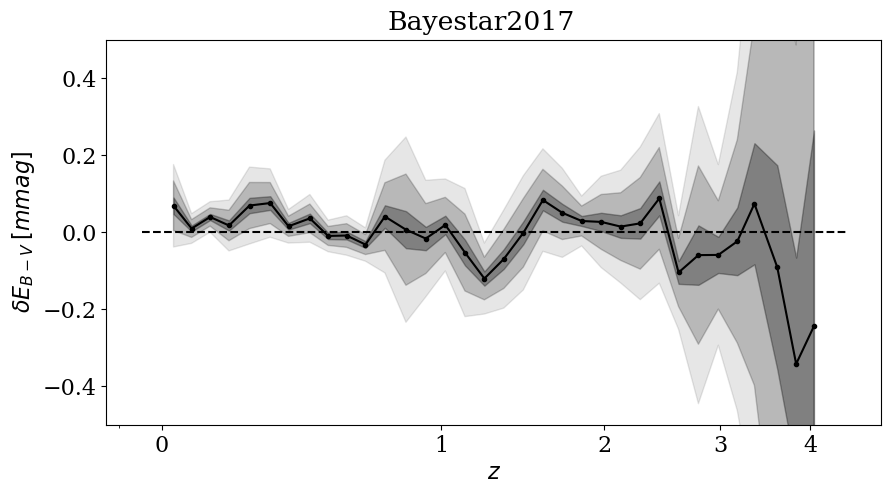

In [20]:
vis_utils.plot_acc_comparison_sampling([accbts[1:2]], cols='k', title='Bayestar2017', 
                sigcontours=[1, 3, 5], no_legend=True, savefig='../plots/accpanel_bootstrapped/11-20_b17.png')

Bayestar19_sm30


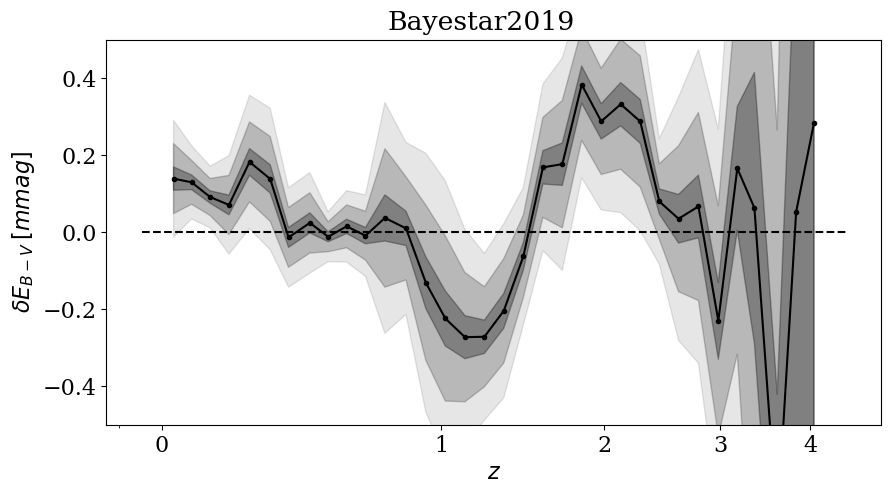

In [21]:
vis_utils.plot_acc_comparison_sampling([accbts[2:3]], cols='k', title='Bayestar2019', 
                        sigcontours=[1, 3, 5], no_legend=True, savefig='../plots/accpanel_bootstrapped/11-20_b19.png')

GNILC_sm30


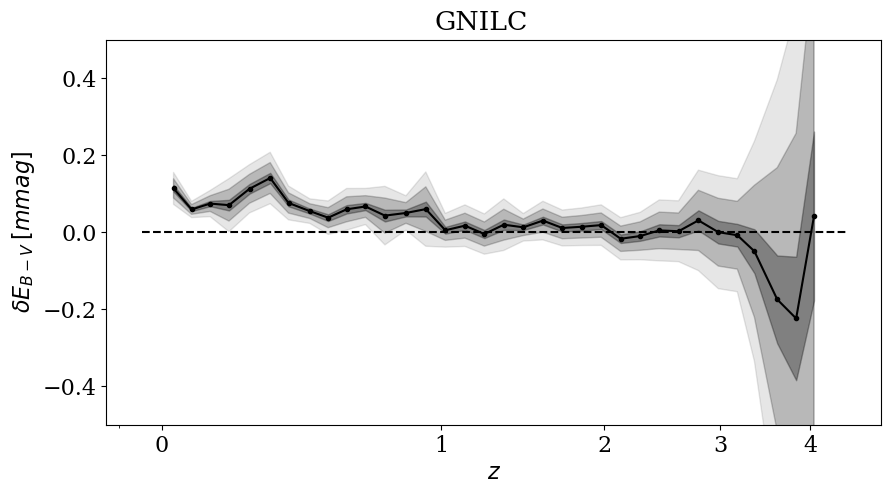

In [22]:
vis_utils.plot_acc_comparison_sampling([accbts[3:4]], cols='k', title='GNILC', 
                sigcontours=[1, 3, 5], no_legend=True, savefig='../plots/accpanel_bootstrapped/11-20_gnilc.png')

Recon FWHM=6.1'_sm30


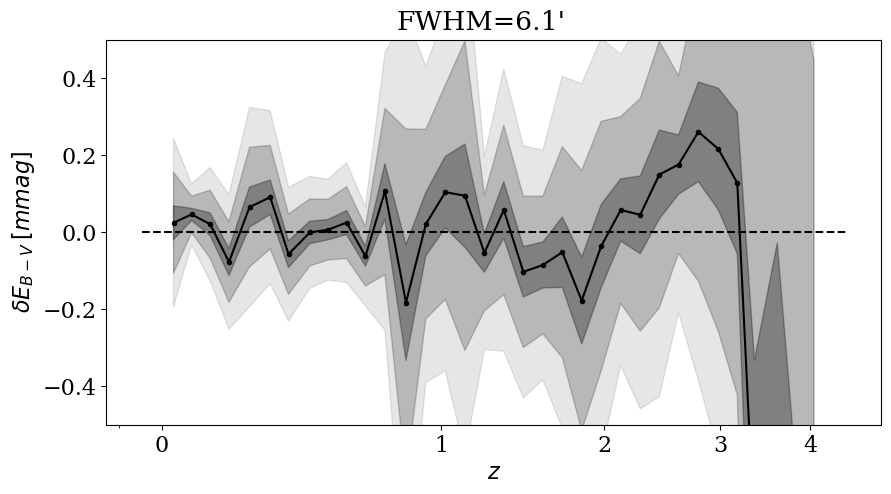

In [23]:
vis_utils.plot_acc_comparison_sampling([accbts[4:5]], cols='k', title='FWHM=6.1\'', 
                                       sigcontours=[1, 3, 5], no_legend=True, savefig='../plots/accpanel_bootstrapped/11-20_fwhm61.png')

Recon FWHM=15'_sm30


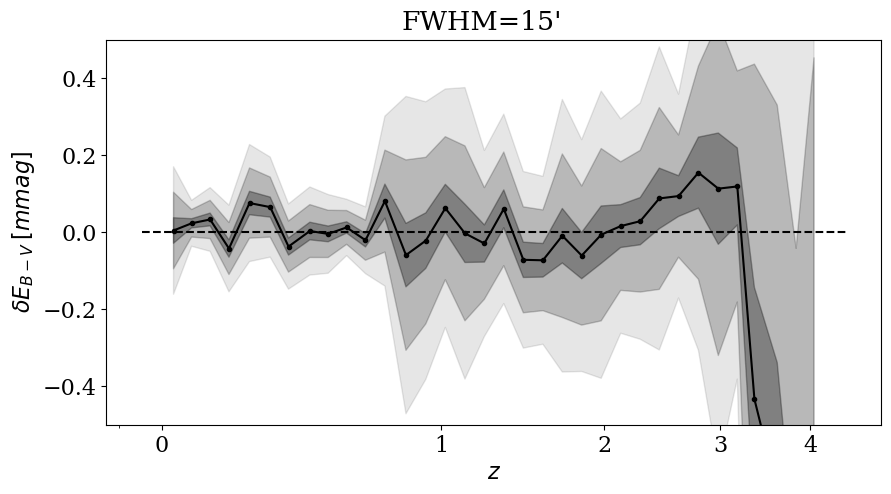

In [24]:
vis_utils.plot_acc_comparison_sampling([accbts[5:6]], cols='k', title='FWHM=15\'', 
                                       sigcontours=[1, 3, 5], no_legend=True, savefig='../plots/accpanel_bootstrapped/11-20_fwhm15.png')

In [51]:
accnoisedict = pickle.load(open('runs/2_6/accdir/noise_acc_intgn_bootstrapped.pkl', 'rb'))
accnoise = accnoisedict['accs_all']

SFDMean+20pctStdNormNoise_sm30


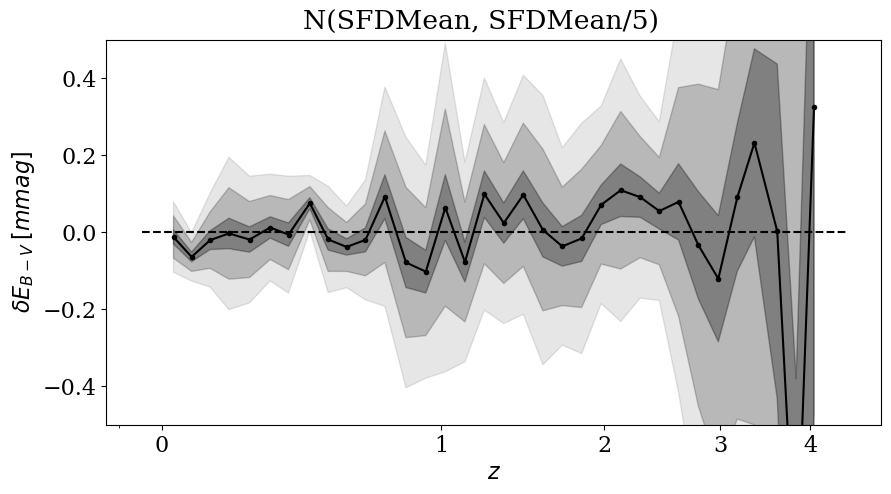

In [53]:
vis_utils.plot_acc_comparison_sampling([accnoise], cols='k', title='N(SFDMean, SFDMean/5)',
                    no_legend=True, sigcontours=[1, 3, 5], savefig='../plots/accpanel_bootstrapped/noise.png')